# 训练与测试

下载数据集：

```ipython
!git clone git@github.com:Sanstyle-Dataset/simple-crack.git ../simple-crack/
```

解压数据：

```python
from zipfile import ZipFile

root = '../simple-crack/' # 数据根目录
Z = ZipFile(f'{root}/dataset.zip')
# 解压全部数据
Z.extractall(root)
```

## 数据载入

In [1]:
cd ..

D:\kaggle\books\tensorflow-crack


In [2]:
from utils.loader import load_data

root = 'simple-crack/dataset'
train_dir = f'{root}/train'
val_dir = f'{root}/valid'
test_dir = f'{root}/test'
predict_dir = f'{root}/predict'


target_size = 224, 224
batch_size = 8
class_mode = 'binary'


train_gen, val_gen, test_gen = load_data(train_dir,
                                         val_dir,
                                         test_dir,
                                         batch_size,
                                         target_size,
                                         class_mode)

Found 600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


## 構建網路模型

In [3]:
import numpy as np
from tensorflow.keras import optimizers
# 载入自定义包
from utils.path_parse import mkdir
from utils.loader_model import create_resnet152, create_resnet152B, create_resnet152C
from utils.write_plot import create_history, plot_history

# 使用同樣的優化器，要保證訓練的參數一致
# optimizer = optimizers.SGD(lr=0.0001, momentum=0.0,
# decay=0.0, nesterov=False)
optimizer = optimizers.Adam(learning_rate=0.001)

resnet152_model = create_resnet152(
    optimizer, loss='binary_crossentropy', metrics=['accuracy'])
resnet152B_model = create_resnet152B(
    optimizer, loss='binary_crossentropy', metrics=['accuracy'])
resnet152C_model = create_resnet152C(
    optimizer, loss='binary_crossentropy', metrics=['accuracy'])
resnet152C_model.summary()
resnet152B_model.summary()
resnet152_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152 (Functional)       (None, 7, 7, 2048)        58370944  
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               51380736  
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 513       
Total params: 109,752,193
Trainable params: 55,846,913
Non-trainable params: 53,905,280
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152 (Functional)       (None, 7, 7, 2048)        58370944  
__________

## 训练与作图

In [4]:
epochs = 10
batch_size = 32
# 設定模型保存路徑
model_root = 'models'
mkdir(model_root)
# 設定數據保存路徑
save_dir = 'results'
mkdir(save_dir)

In [5]:
def log_model(model, model_name, train_gen, val_gen,
              epochs, batch_size,
              save_dir, model_root):
    save_dir = f'{save_dir}/{model_name}'
    mkdir(save_dir)
    checkpoint_filepath = f'{save_dir}/' + \
        'weights.{epoch:03d}-{val_loss:.7f}.h5'
    history = create_history(
        model, epochs, batch_size,
        train_gen, val_gen,
        checkpoint_filepath)
    plot_history(history, save_dir, model_name)
    model.save(f'{model_root}/{model_name}.h5')
    return history

### resnet152

Epoch 1/10
75/75 [==============================] - 38s 246ms/step - loss: 0.3489 - accuracy: 0.9117 - val_loss: 0.2603 - val_accuracy: 0.8958
Epoch 2/10
75/75 [==============================] - 13s 169ms/step - loss: 0.0792 - accuracy: 0.9750 - val_loss: 0.5425 - val_accuracy: 0.7500
Epoch 3/10
75/75 [==============================] - 13s 171ms/step - loss: 0.1003 - accuracy: 0.9700 - val_loss: 0.0643 - val_accuracy: 0.9792
Epoch 4/10
75/75 [==============================] - 13s 169ms/step - loss: 0.0909 - accuracy: 0.9683 - val_loss: 0.2248 - val_accuracy: 0.9583
Epoch 5/10
75/75 [==============================] - 13s 170ms/step - loss: 0.0637 - accuracy: 0.9783 - val_loss: 0.2645 - val_accuracy: 0.9583
Epoch 6/10
75/75 [==============================] - 13s 170ms/step - loss: 0.2031 - accuracy: 0.9483 - val_loss: 0.2769 - val_accuracy: 0.9167
Epoch 7/10
75/75 [==============================] - 13s 168ms/step - loss: 0.0498 - accuracy: 0.9767 - val_loss: 0.1652 - val_accuracy: 0.9792

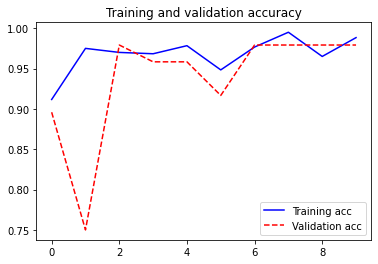

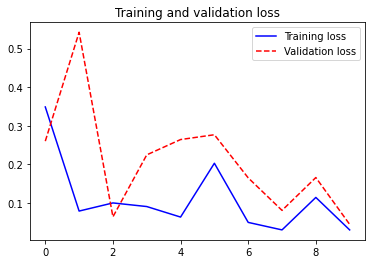

C:\Users\xinet\.conda\envs\tf\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [6]:
model_name = 'resnet152'
model = resnet152_model
resnet152_history = log_model(model, model_name,
                              train_gen, val_gen,
                              epochs, batch_size,
                              save_dir, model_root)

### resnet152B

Epoch 1/10
75/75 [==============================] - 35s 240ms/step - loss: 9.8274 - accuracy: 0.8533 - val_loss: 4.5934e-10 - val_accuracy: 1.0000
Epoch 2/10
75/75 [==============================] - 13s 170ms/step - loss: 0.7661 - accuracy: 0.9583 - val_loss: 0.9122 - val_accuracy: 0.9375
Epoch 3/10
75/75 [==============================] - 13s 169ms/step - loss: 0.3806 - accuracy: 0.9617 - val_loss: 0.1451 - val_accuracy: 0.9792
Epoch 4/10
75/75 [==============================] - 13s 169ms/step - loss: 0.2734 - accuracy: 0.9717 - val_loss: 0.3053 - val_accuracy: 0.9792
Epoch 5/10
75/75 [==============================] - 13s 169ms/step - loss: 0.0957 - accuracy: 0.9800 - val_loss: 0.2219 - val_accuracy: 0.9792
Epoch 6/10
75/75 [==============================] - 13s 170ms/step - loss: 0.1376 - accuracy: 0.9667 - val_loss: 1.0592e-04 - val_accuracy: 1.0000
Epoch 7/10
75/75 [==============================] - 13s 169ms/step - loss: 0.0504 - accuracy: 0.9850 - val_loss: 0.0318 - val_accuracy

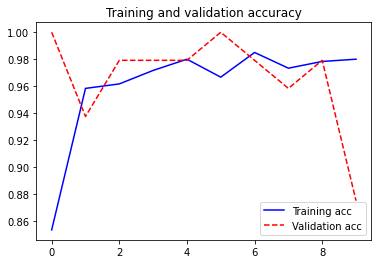

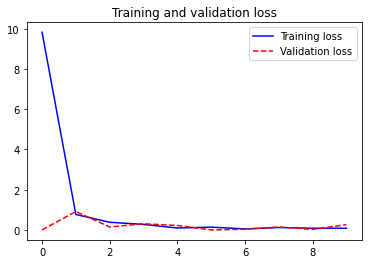

In [7]:
model_name = 'resnet152B'
model = resnet152B_model
log_model(model, model_name,
          train_gen, val_gen,
          epochs, batch_size,
          save_dir, model_root)

### resnet152C

Epoch 1/10
75/75 [==============================] - 37s 237ms/step - loss: 16.3992 - accuracy: 0.8733 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
75/75 [==============================] - 13s 169ms/step - loss: 2.5950 - accuracy: 0.9217 - val_loss: 7.9883e-08 - val_accuracy: 1.0000
Epoch 3/10
75/75 [==============================] - 13s 169ms/step - loss: 0.2690 - accuracy: 0.9700 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 4/10
75/75 [==============================] - 13s 169ms/step - loss: 0.1373 - accuracy: 0.9683 - val_loss: 0.0328 - val_accuracy: 0.9792
Epoch 5/10
75/75 [==============================] - 13s 170ms/step - loss: 0.1262 - accuracy: 0.9717 - val_loss: 0.0631 - val_accuracy: 0.9792
Epoch 6/10
75/75 [==============================] - 13s 169ms/step - loss: 0.1133 - accuracy: 0.9800 - val_loss: 0.1140 - val_accuracy: 0.9583
Epoch 7/10
75/75 [==============================] - 13s 169ms/step - loss: 0.1337 - accuracy: 0.9717 - val_loss: 0.0612 - val_accurac

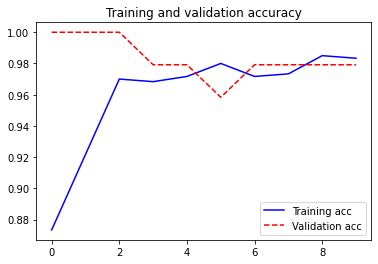

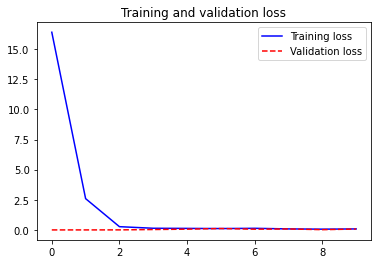

In [8]:
# 儲存模型
model_name = 'resnet152C'
model = resnet152C_model
log_model(model, model_name,
          train_gen, val_gen,
          epochs, batch_size,
          save_dir, model_root)

## 测试模型

In [9]:
def test_result(model, test_generator, batch_size):
    results = model.evaluate(x=test_generator,
                             batch_size=batch_size,
                             return_dict=True)
    return results

In [10]:
resnet152_results = test_result(resnet152_model, test_gen, batch_size)
resnet152B_results = test_result(resnet152B_model, test_gen, batch_size)
resnet152C_results = test_result(resnet152C_model, test_gen, batch_size)

25/25 [==============================] - 3s 106ms/step - loss: 0.0460 - accuracy: 1.0000
